In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score

import tensorflow as tf
import tensorflow_addons as tfa

sns.set_style('darkgrid')

%matplotlib inline

C:\Users\psath\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
df=pd.read_csv(r"C:\Users\psath\Downloads\DL Assignment 2\archive (2)\train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<AxesSubplot:>

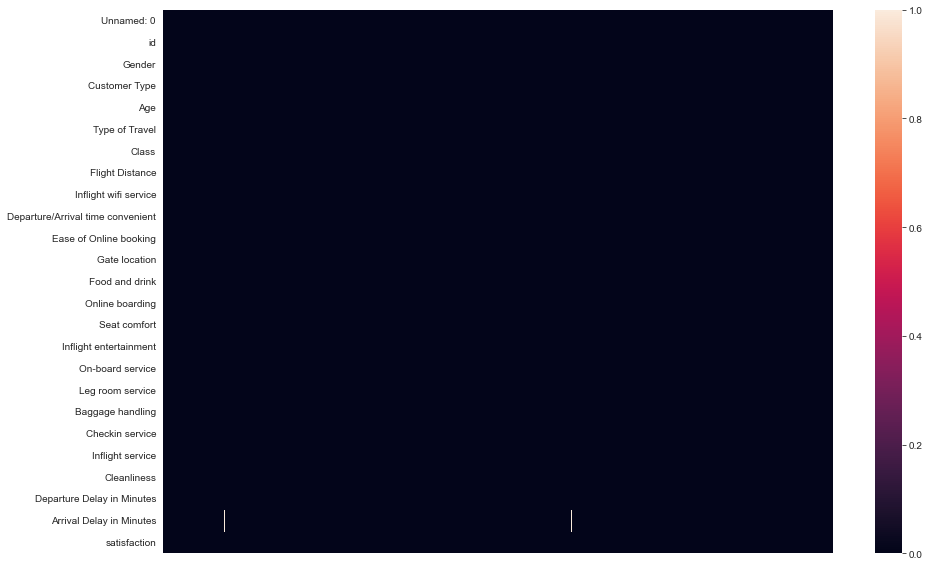

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna().transpose(),xticklabels=False)

In [6]:
df['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(axis=0),inplace=True)

<AxesSubplot:>

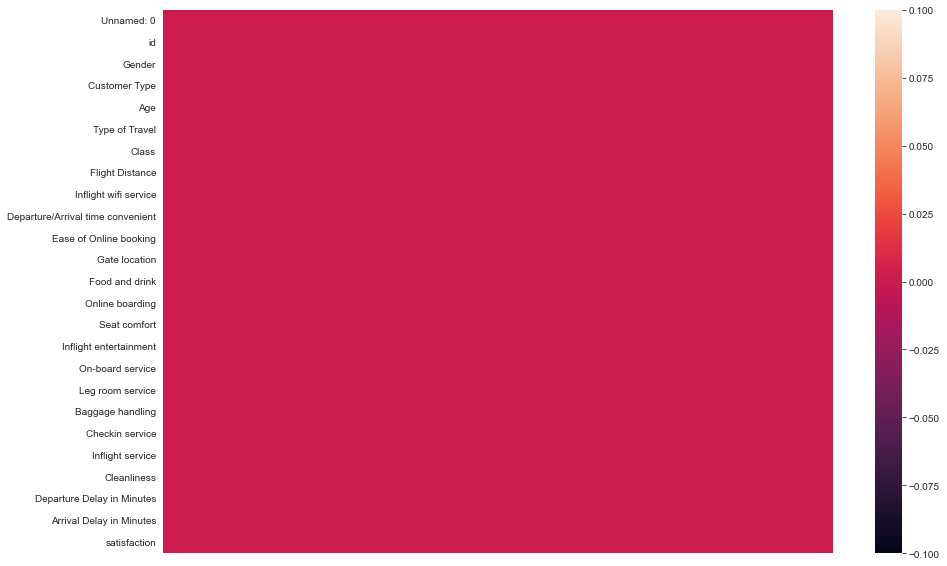

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isna().transpose(),xticklabels=False)

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
for col in df.select_dtypes(include='object'):
    print(f"{col:30} ----> {df[col].nunique()} unique values")

Gender                         ----> 2 unique values
Customer Type                  ----> 2 unique values
Type of Travel                 ----> 2 unique values
Class                          ----> 3 unique values
satisfaction                   ----> 2 unique values


# EDA step1 (Drop columns and change data type)

**Dropping Unnamed:0 and id**
**Changing Age,Flight distance,Depature Delay in Minutes,Arrival Delay in Minutes to float( For Scaling Maybe)**
**Also have to do target preprocessing**

In [11]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [12]:
for col in ['Arrival Delay in Minutes','Departure Delay in Minutes','Age','Flight Distance']:
    df[col]=df[col].astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  float64
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# EDA Part 2

<AxesSubplot:>

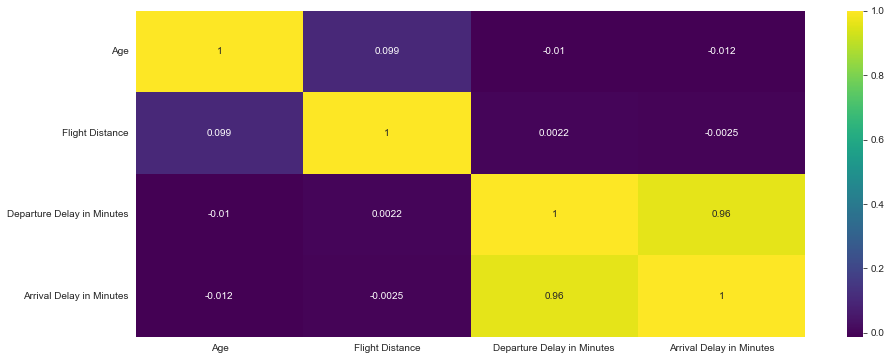

In [14]:
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(include='float64').corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

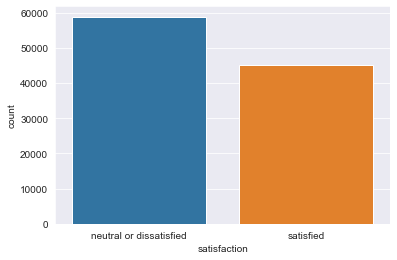

In [15]:
sns.countplot(x='satisfaction',data=df)

**Nearly same amount so no need for resampling**

In [16]:
num_sub_plot=len(df.select_dtypes(include='int64').columns)

In [17]:
col_1=['Arrival Delay in Minutes','Departure Delay in Minutes']
col_2=['Age','Flight Distance']

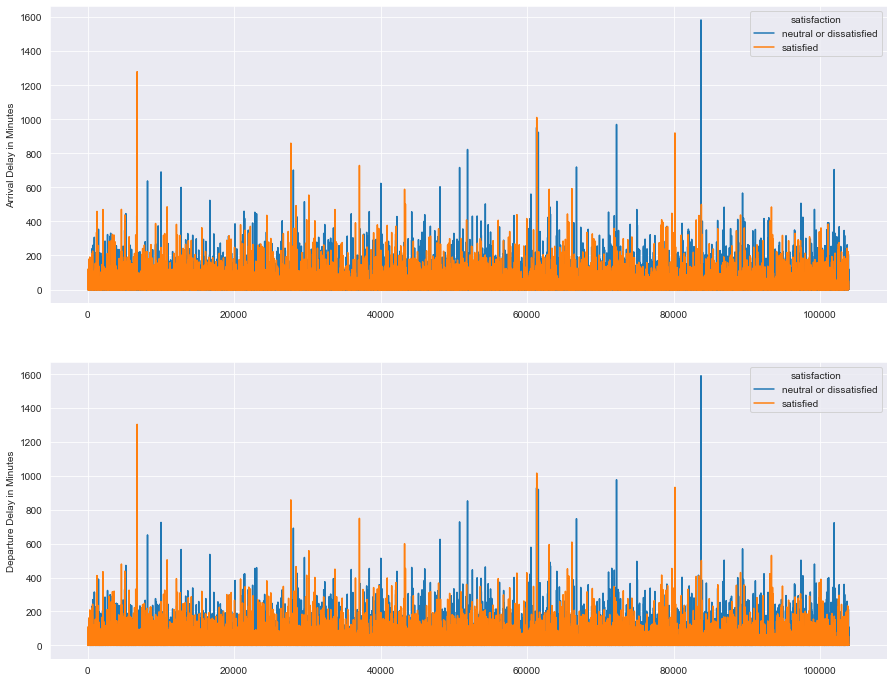

In [18]:
fig,ax=plt.subplots(len(col_1),1,figsize=(15,12))
axi=0
for col in col_1:
    sns.lineplot(data=df,y=col,x=range(len(df)),hue='satisfaction',ax=ax[axi])
    axi+=1

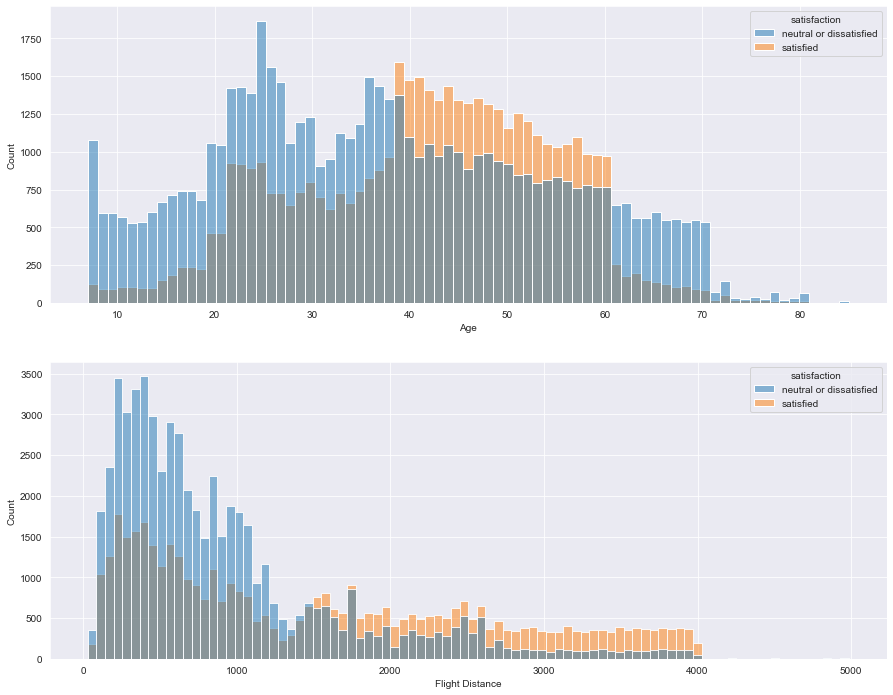

In [19]:
fig,ax=plt.subplots(len(col_2),1,figsize=(15,12))
axi=0
for col in col_2:
    sns.histplot(data=df,x=col,hue='satisfaction',ax=ax[axi])
    axi+=1

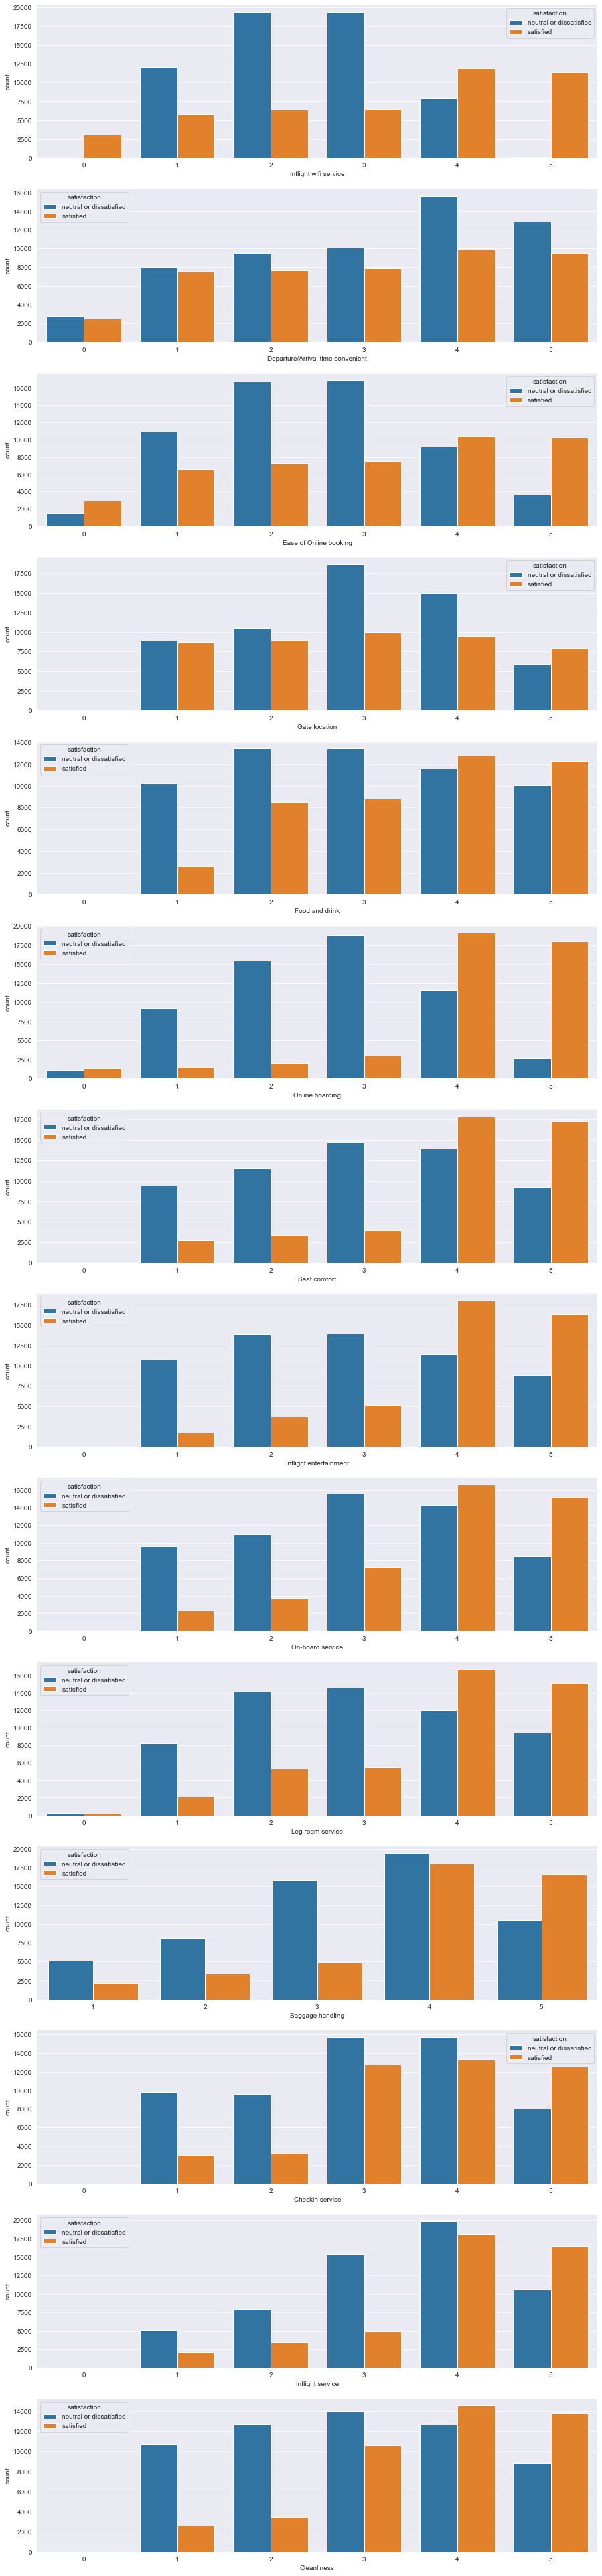

In [20]:
fig,ax=plt.subplots(num_sub_plot,1,figsize=(15,70))
axi=0
for col in df.select_dtypes(include='int64'):
    sns.countplot(data=df,x=col,hue='satisfaction',ax=ax[axi])
    axi+=1

# Data Preprocessing
## First step identifying target variable column

**Here our target variable column is satisfication**\
**0=neutral or dissatisfied ; 1=satisfied**

In [21]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [22]:
df['satisfaction']=df['satisfaction'].apply(lambda x: 1 if(x=='satisfied') else 0)    

In [23]:
df['satisfaction'].value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

## Seperating train and test

In [24]:
df.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,0
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,0


In [25]:
X=df.drop(['satisfaction'],axis=1)
y=df['satisfaction']

In [26]:
X.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13.0,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,5,4,3,4,4,5,5,25.0,18.0
1,Male,disloyal Customer,25.0,Business travel,Business,235.0,3,2,3,3,...,1,1,1,5,3,1,4,1,1.0,6.0


In [27]:
y.head(2)

0    0
1    0
Name: satisfaction, dtype: int64

## Train and test split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.15,random_state=42,stratify=y_train)

In [29]:
X_train.shape,y_train.shape

((70654, 22), (70654,))

In [30]:
X_test.shape,y_test.shape

((20781, 22), (20781,))

In [31]:
X_val.shape,y_val.shape

((12469, 22), (12469,))

In [32]:
X_test.head(2)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
89374,Female,disloyal Customer,32.0,Business travel,Business,515.0,3,3,3,4,...,2,2,4,4,5,5,4,2,0.0,0.0
8211,Male,Loyal Customer,34.0,Business travel,Business,236.0,2,1,1,1,...,3,2,2,2,2,2,2,4,0.0,0.0


In [33]:
y_test.head(2)

89374    0
8211     0
Name: satisfaction, dtype: int64

# Object and Numerical Preprocessing

In [34]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object')),
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
],remainder='passthrough',n_jobs=-1)

# Data Preprocessing step 2

In [35]:
X_train=ct.fit_transform(X_train)
X_val=ct.transform(X_val)
X_test=ct.transform(X_test)

In [36]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('cat_encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), ['Gender', 'Customer Type', 'Type of Travel', 'Class'])
['Gender_Male' 'Customer Type_disloyal Customer'
 'Type of Travel_Personal Travel' 'Class_Eco' 'Class_Eco Plus']
--------------------------------------------------
('num_encoder', StandardScaler(), ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'])
['Age' 'Flight Distance' 'Departure Delay in Minutes'
 'Arrival Delay in Minutes']
--------------------------------------------------
('remainder', 'passthrough', [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
--------------------------------------------------


In [37]:
X_train.shape,y_train.shape

((70654, 23), (70654,))

In [38]:
X_test

array([[0., 1., 0., ..., 5., 4., 2.],
       [1., 0., 0., ..., 2., 2., 4.],
       [1., 1., 0., ..., 3., 4., 3.],
       ...,
       [1., 0., 0., ..., 3., 4., 3.],
       [1., 0., 1., ..., 5., 5., 5.],
       [0., 0., 0., ..., 3., 5., 3.]])

In [39]:
tup1=None;tup2=None
try:
    tup1=(X_test[0],y_test.head(1).values)  
except:
    tup2=(X_test[0].toarray(),y_test.head(1).values) # scientific notation

tup1,tup2

((array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         -0.48806234, -0.67637932, -0.3886326 , -0.39349797,  3.        ,
          3.        ,  3.        ,  4.        ,  2.        ,  3.        ,
          2.        ,  2.        ,  4.        ,  4.        ,  5.        ,
          5.        ,  4.        ,  2.        ]),
  array([0], dtype=int64)),
 None)

In [40]:
X_test.shape,y_test.shape

((20781, 23), (20781,))

# Tensorflow 

In [41]:
batch_size=256
num_layer=8
n=num_layer

# Tensorflow Batches Prepraration

In [42]:
X_train,X_train.shape

(array([[1., 0., 0., ..., 3., 4., 5.],
        [1., 0., 0., ..., 4., 5., 3.],
        [1., 0., 0., ..., 1., 4., 1.],
        ...,
        [0., 0., 0., ..., 5., 4., 3.],
        [0., 1., 0., ..., 2., 2., 5.],
        [1., 1., 0., ..., 4., 2., 3.]]),
 (70654, 23))

In [43]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_tr_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_te=tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_te_batches = data_tf_te.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_tre_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Model fitting

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping

e=EarlyStopping(patience=5,restore_best_weights=True,verbose=1)

In [45]:
model=Sequential()

#Input Layer
model.add(Input(shape=(X_train.shape[1],)))

#Hidden Layer
for counter in range(n):
    model.add(Dense(n*X_train.shape[1],activation='relu'))
#     if(counter%2==0):
#         model.add(Dropout(0.5))

#Output Layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics = [ 'accuracy',
                         tf.keras.metrics.AUC(name='AUC_ROC',curve='ROC',num_thresholds=10000) ,
                         tfa.metrics.F1Score(name='F1_Score',num_classes=1,average='macro',threshold=0.5)
                        ]
             )

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 184)               4416      
                                                                 
 dense_1 (Dense)             (None, 184)               34040     
                                                                 
 dense_2 (Dense)             (None, 184)               34040     
                                                                 
 dense_3 (Dense)             (None, 184)               34040     
                                                                 
 dense_4 (Dense)             (None, 184)               34040     
                                                                 
 dense_5 (Dense)             (None, 184)               34040     
                                                                 
 dense_6 (Dense)             (None, 184)               3

In [47]:
%%time
history=model.fit(data_tr_batches,epochs=100,callbacks=[e],validation_data=data_val_batches,verbose=1)

Epoch 1/100
276/276 [==============================] - 5s 10ms/step - loss: 0.2469 - accuracy: 0.8922 - AUC_ROC: 0.9617 - F1_Score: 0.8755 - val_loss: 0.1487 - val_accuracy: 0.9384 - val_AUC_ROC: 0.9857 - val_F1_Score: 0.9270
Epoch 2/100
276/276 [==============================] - 2s 8ms/step - loss: 0.1463 - accuracy: 0.9405 - AUC_ROC: 0.9860 - F1_Score: 0.9303 - val_loss: 0.1342 - val_accuracy: 0.9425 - val_AUC_ROC: 0.9885 - val_F1_Score: 0.9318
Epoch 3/100
276/276 [==============================] - 3s 11ms/step - loss: 0.1298 - accuracy: 0.9465 - AUC_ROC: 0.9890 - F1_Score: 0.9371 - val_loss: 0.1145 - val_accuracy: 0.9504 - val_AUC_ROC: 0.9910 - val_F1_Score: 0.9417
Epoch 4/100
276/276 [==============================] - 2s 8ms/step - loss: 0.1213 - accuracy: 0.9489 - AUC_ROC: 0.9903 - F1_Score: 0.9399 - val_loss: 0.1202 - val_accuracy: 0.9497 - val_AUC_ROC: 0.9914 - val_F1_Score: 0.9423
Epoch 5/100
276/276 [==============================] - 2s 9ms/step - loss: 0.1166 - accuracy: 0.95

<AxesSubplot:>

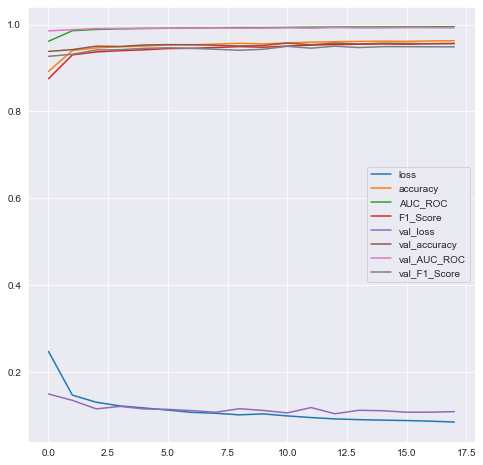

In [48]:
d1=pd.DataFrame(history.history)
d1.plot(figsize=(8,8))

# Testing

In [49]:
model.evaluate(data_te_batches)

82/82 [==============================] - 0s 6ms/step - loss: 0.1017 - accuracy: 0.9569 - AUC_ROC: 0.9935 - F1_Score: 0.9499


[0.10170900076627731,
 0.9568836688995361,
 0.9934820532798767,
 0.9499273896217346]

In [51]:
score_dict={}
pred=(model.predict(data_tre_batches)>0.5).astype(int)

print(classification_report(pred,y_test))


score_dict['model']={
        'roc_auc_score':roc_auc_score(y_test.values,pred),
        'f1_score':f1_score(y_test.values,pred),
        'accuracy_score':accuracy_score(y_test.values,pred)
    }

82/82 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     11892
           1       0.94      0.96      0.95      8889

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



In [52]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('roc_auc_score',ascending=False)
score_pd

,accuracy_score,f1_score,roc_auc_score
model,0.956884,0.949927,0.955345


## Confusion Matrix for the Model

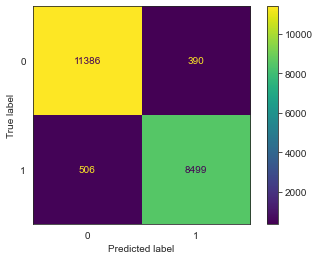

In [53]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions(y_test.values,pred)

# Final testing

In [54]:
df_test=pd.read_csv(r"C:\Users\psath\Downloads\DL Assignment 2\archive (2)\test.csv")

df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [55]:
df_test['Arrival Delay in Minutes'].fillna(value=df['Arrival Delay in Minutes'].median(axis=0),inplace=True)

In [56]:
df_test['satisfaction']=df_test['satisfaction'].apply(lambda x: 1 if(x=='satisfied') else 0)    

X_df_test=df_test.drop(['satisfaction'],axis=1)
y_df_test=df_test[['satisfaction']]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  float64
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [58]:
X_df_test=ct.transform(X_df_test)

In [59]:
data_df_tf_tre=tf.data.Dataset.from_tensor_slices(X_df_test)
data_df_tre_batches = data_df_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Results for Winning model before Tuning

102/102 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



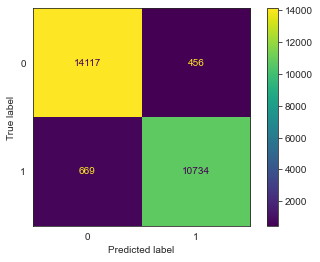

In [60]:
pred_test=(model.predict(data_df_tre_batches)>0.5).astype(int)

print(classification_report(y_df_test.values,pred_test))

ConfusionMatrixDisplay.from_predictions(y_df_test.values,pred_test)